# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].value_counts()



g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mice





array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupicated_mice_id = combined_data.loc[combined_data["Mouse ID"] == "g989"]
dupicated_mice_id



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(dupicated_mice_id.index)
clean_data.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].value_counts()


k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen = clean_data.groupby("Drug Regimen")
mean = drug_regimen["Tumor Volume (mm3)"].mean()
median = drug_regimen["Tumor Volume (mm3)"].median()
variance = drug_regimen["Tumor Volume (mm3)"].var()
std = drug_regimen["Tumor Volume (mm3)"].std()
sem = drug_regimen["Tumor Volume (mm3)"].sem()
sum_stats_table = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std, "Tumor Volume Std. Err.": sem})
sum_stats_table







,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
sum_stats_table_agg = clean_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
sum_stats_table_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

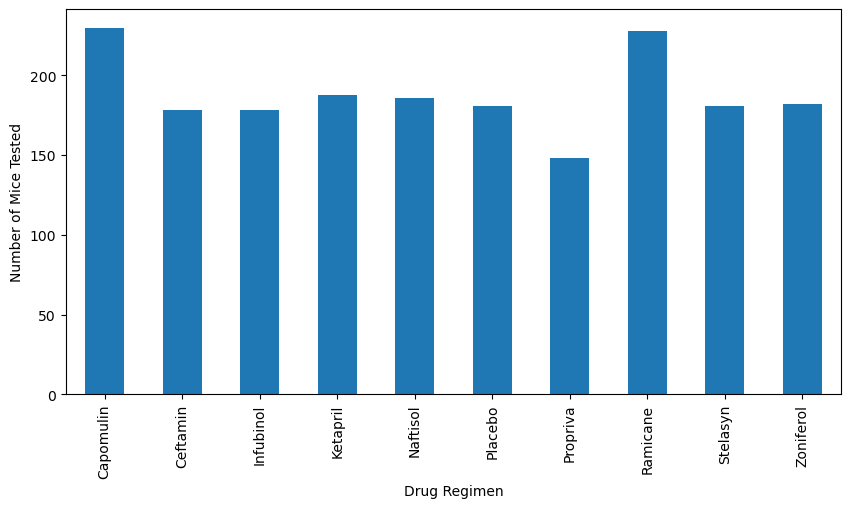

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints = clean_data.groupby("Drug Regimen")["Timepoint"].count()
# label y axis to the number mice tested
timepoints.plot(kind="bar", figsize=(10,5), ylabel="Number of Mice Tested")
plt.show()






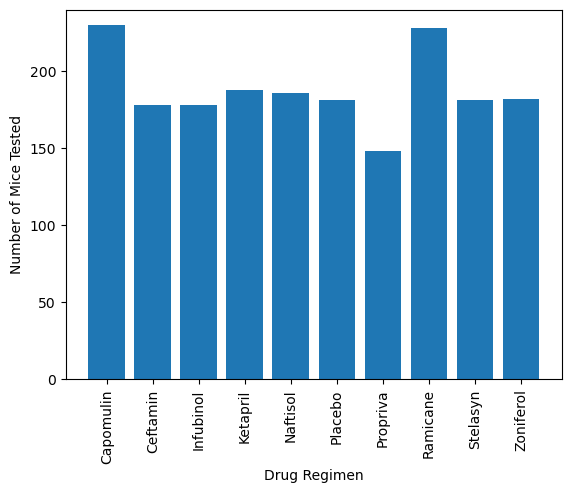

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Count the amount of timepoints for each drug regimen
timepoints = clean_data.groupby("Drug Regimen")["Timepoint"].count()
# Set the x axis to the amount of timepoints for each drug regimen
x_axis = np.arange(len(timepoints))
# Create a bar chart based off of the group series from before
plt.bar(x_axis, timepoints,)
# Create a list of drug regimens in the same order as our x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(timepoints.index), rotation="vertical")
# Set y limit
plt.ylim(0, max(timepoints)+10)
# Set Labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()





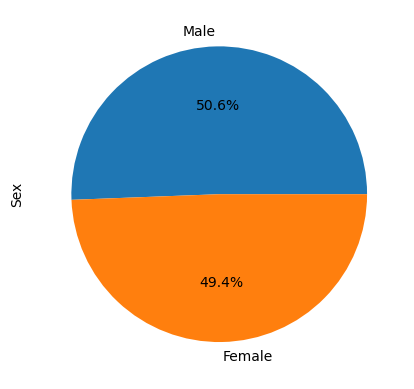

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
data_sex = combined_data["Sex"].value_counts()
pie_plot = data_sex.plot(kind="pie", autopct="%1.1f%%",)
plt.show()











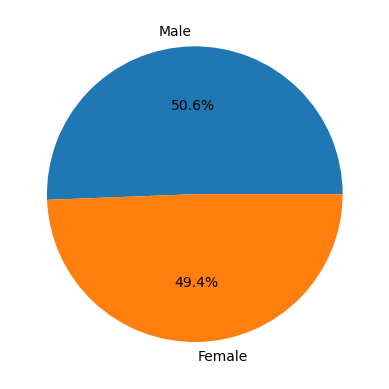

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
data_sex = combined_data["Sex"].value_counts()
# Use matplotlib to create a pie chart based upon the above data
plt.pie(data_sex,labels= data_sex.index.values, autopct="%1.1f%%",)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_data.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(clean_data, max_timepoint, on='Mouse ID')
merged_data.head()

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    each_drug = merged_data.loc[merged_data["Drug Regimen"] == drug]
    # add subset 
    final_timepoint_tumor_volume = each_drug.loc[each_drug["Timepoint"] == each_drug["max_timepoint"]]
    # Each drug series by tumor volume mm3
    final_tumor_volume_values = final_timepoint_tumor_volume["Tumor Volume (mm3)"]
    drug_values.append(final_tumor_volume_values)
    # Determine interquartile range and outliers using upper and lower bounds for each treatment group
    quartiles = final_tumor_volume_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (final_tumor_volume_values.loc[(final_timepoint_tumor_volume["Tumor Volume (mm3)"] >= upper_bound) | (final_timepoint_tumor_volume ["Tumor Volume (mm3)"] <= lower_bound)]).count()
    # Print results
    print(f"IQR for {drug}: {iqr}")
    print(f"Outliers for {drug}: {outliers}")



IQR for Capomulin: 7.781863460000004
Outliers for Capomulin: 0
IQR for Ramicane: 9.098536719999998
Outliers for Ramicane: 0
IQR for Infubinol: 11.477135160000003
Outliers for Infubinol: 1
IQR for Ceftamin: 15.577752179999997
Outliers for Ceftamin: 0


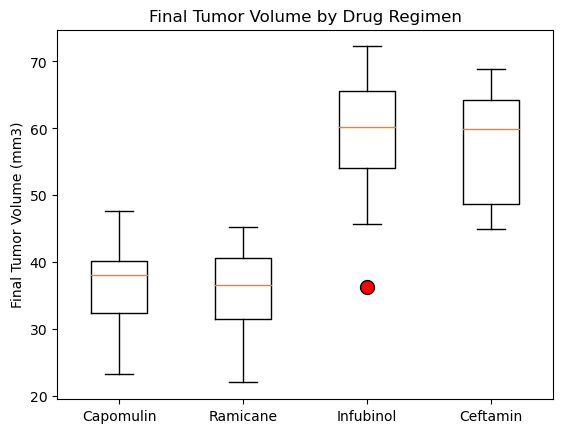

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, tumor_plot = plt.subplots()
# Set title and labels
tumor_plot.set_title('Final Tumor Volume by Drug Regimen')
tumor_plot.set_ylabel('Final Tumor Volume (mm3)')
tumor_plot.boxplot(drug_values, labels=drug_list, flierprops={'markerfacecolor':'r','markersize': 10})
plt.show()



## Line and Scatter Plots

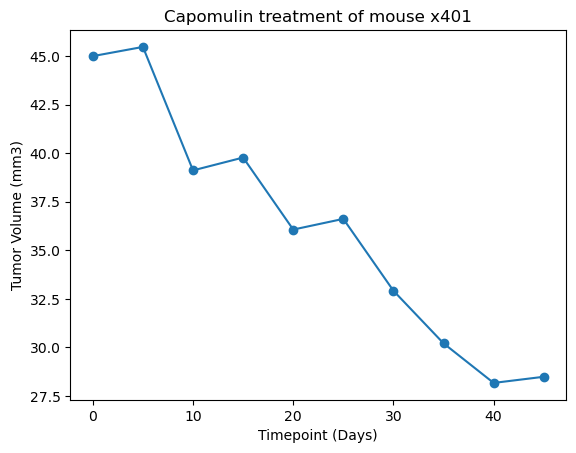

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select a mouse that was treated with Capomulin
mouse= clean_data.loc[clean_data["Mouse ID"] == "x401"]
# Create a line plot of tumor volume vs. time point for the mouse
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"], marker ='o')
# Set title and labels
plt.title('Capomulin treatment of mouse x401')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()







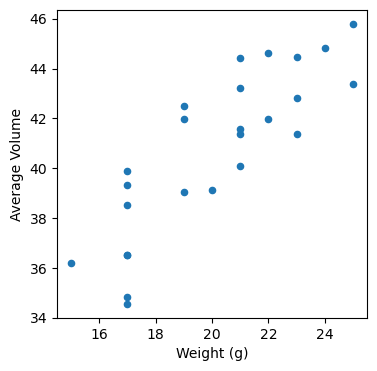

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Select all mice treated with Capomulin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]
# Calculate the average tumor volume for each mouse
capomulin_avg = pd.DataFrame(capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# Rename the column
capomulin_avg = capomulin_avg.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
# Create a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Average Volume", figsize=(4,4),)
plt.show()




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


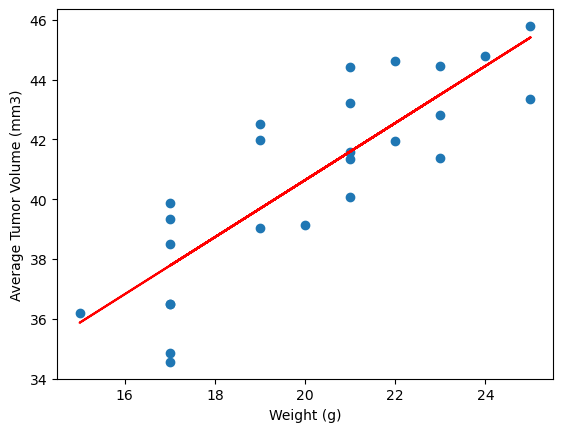

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_avg["Weight (g)"],capomulin_avg["Average Volume"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# Add the linear regression equation and line to plot
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



